### Project 1: A Dive into Police Shootings and their City Dynamics
*by Hannah Wendling and Krishna Tripathi*

###Introduction

Find the dataset [here](https://github.com/washingtonpost/data-police-shootings/blob/master/v1/fatal-police-shootings-data.csv) on GitHub.

Steps we went through:
*   Did an exploratory analysis, representing the data in various ways to see if anything appears striking right off the bat.
  - Modularized each step so we could regenerate general stats about the dataset anytime.
*   Adjusted some numbers based on general population info: adjusted age stats by population for each age,  divided shootings per city by the city population to get per capita shootings, etc.
  - Note that we used city population in 2022 for this step. The shootings data is collected over many years, during which the population may have varied. However, we assumed the population of most cities *relative* to other citites remained fairly the same.
- Ranked the cities by per-capita shootings. Picked an interesting city: Albuquerque, which had phenomenally high per-capita shootings, to focus our analysis on.
- Created a sub-dataframe containing only Albequerque shootings. Generated the same exploratory numbers and charts that we did for our original dataframe, for Albuquerque.
- Now used the functions we created earlier to generate visualizations of stats for police killings *in general* versus police killings *in Albuquerque*, to show that Albuquerque does stand out.
- Compared racial group counts in Albuquerque and nationwide; saw that there is a stark difference between races regarding police killings, which is starker in Albuquerque.

Possible uses for this:
- Could be presented to authorities (in real life we're sure they already know about this, but this analysis can definitely form part of a larger report or call-to-action)
  - Present to Albuquerque authorities, federal-level authorities or non-profits to help them decide where to focus their efforts.
- Project could further be expanded with a larger/more detailed dataset (gender of police officers?)
- Analysis could be deepened and made more granular by seeing relatioship between poverty rate, education rate, etc. and police killings - depending on which factor we specifically want to examine.
- The same analysis we did could be replicated for multiple cities, or with machine-learning models could be expanded to create a heatmap for the US (which states are more dangerous than others, which cities in those states, etc.)
  - The heatmap would *certainly* be very useful for federal-level analysis. Though out-of-scope for the current version of our project, a solid further research avenue.



###Setup
Import the libraries and setup the data we'll use.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Path to the file on GitHub
github_rawdata_filepath = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v1/fatal-police-shootings-data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(github_rawdata_filepath)

Let's print the df's head (and tail) to see how it looks.



In [ ]:
df.head()
# print(df.tail)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


### Formatting
Let's drop some unneeded columns.

In [ ]:
# Get rid of uneeded columns
columns_to_drop = ['name' ,'longitude', 'latitude', 'is_geocoding_exact']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

### Exploratory data analysis
Let's look at various features of the dataset in-general and visualize some of it to see what might stands out that we can investigate further.

Begin with "age" variable.

In [ ]:
df['age'].describe()  # Oh. This dataset is diff from the other one.

count    7499.000000
mean       37.209228
std        12.979490
min         2.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64

In [ ]:
df_sorted = df.sort_values(by='age')

# Get the smallest 5 ages using the head method
smallest_5_ages = df_sorted.head(8)

# Print or display the result
print(smallest_5_ages)

        id        date manner_of_death         armed   age gender race  \
7241  7981  2022-03-26            shot       unarmed   2.0      F  NaN   
833    980  2015-11-03            shot       unarmed   6.0      M    W   
2899  3229  2017-12-21            shot       unarmed   6.0      M    W   
6642  7322  2021-08-27            shot       unarmed   8.0      F  NaN   
1017  1165  2016-01-11            shot       unarmed  12.0      F    W   
7163  7785  2022-03-01            shot           gun  12.0      M  NaN   
6195  6729  2021-03-29            shot  undetermined  13.0      M    H   
1680  1883  2016-09-14            shot    toy weapon  13.0      M    B   

                city state  signs_of_mental_illness threat_level         flee  \
7241  Baxter Springs    KS                    False        other          NaN   
833       Marksville    LA                    False        other          Car   
2899         Schertz    TX                    False        other  Not fleeing   
6642     

In [ ]:
value_counts = df['age'].value_counts()
print(value_counts.head(10))

31.0    261
32.0    257
27.0    257
33.0    254
34.0    251
29.0    244
35.0    243
30.0    243
25.0    240
28.0    232
Name: age, dtype: int64


It would be good to have a histogram showing the frequency of victims by age group.

Let's prep for it by setting up bins:

In [ ]:
bins = [0, 18, 28, 38, 48, 58, 100]
labels = ['0-18', '19-28', '29-38', '39-48', '49-58', '58+']

# Cut up the dataframe conveniently based on the bins
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_range_counts = df['age_range'].value_counts()

print(age_range_counts)

29-38    2429
19-28    1771
39-48    1563
49-58     974
58+       627
0-18      135
Name: age_range, dtype: int64


Examining the column we'll be using:

In [ ]:
column_name = 'age_range'
column_dtype = df[column_name].dtype

print(f"The data type of '{column_name}' is {column_dtype}.")

The data type of 'age_range' is category.


In [ ]:
# See how the dataframe looks different now because of age RANGES vs "ages" as earlier
df.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_range
0,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,49-58
1,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,39-48
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,19-28
3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,29-38
4,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,39-48


Create a plotting function and run it.

Category Counts:
0-18      135
19-28    1771
29-38    2429
39-48    1563
49-58     974
58+       627
Name: age_range, dtype: int64


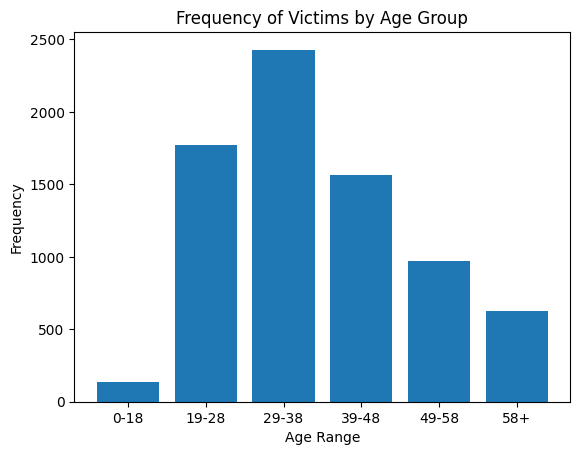

In [ ]:
def show_frequency_of_victims_by_age_group(dataframe):
  category_counts = dataframe['age_range'].value_counts()

  # Sort the categories based on their natural order
  sorted_category_counts = category_counts.sort_index()

  print("Category Counts:")
  print(sorted_category_counts)

  # Plotting the histogram with sorted bars
  plt.bar(sorted_category_counts.index, sorted_category_counts)
  plt.xlabel('Age Range')
  plt.ylabel('Frequency')
  plt.title('Frequency of Victims by Age Group')

  # Uncomment to add text annotations
  # for i, freq in enumerate(sorted_category_counts):
  #     plt.text(i, freq + 0.1, str(freq), ha='center', va='bottom')

  plt.show()

show_frequency_of_victims_by_age_group(df)

#### Examining the variable "armed". Was the victim armed or not?

In [ ]:
df.shape

(8002, 14)

In [ ]:
df['armed'].unique()


array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

In [ ]:
df['armed'].describe()

count     7791
unique     106
top        gun
freq      4573
Name: armed, dtype: object

In [ ]:
460/7791


0.0590424849184957

In [ ]:
df['armed'].value_counts()

gun                    4573
knife                  1142
unarmed                 460
undetermined            338
vehicle                 284
                       ... 
chainsaw                  1
gun and sword             1
claimed to be armed       1
cordless drill            1
stone                     1
Name: armed, Length: 106, dtype: int64

In [ ]:
# Let's see how many times the victim had a gun or a knife, etc.
value_counts = df['armed'].value_counts()
print(value_counts.head(30))

gun                 4573
knife               1142
unarmed              460
undetermined         338
vehicle              284
toy weapon           248
unknown weapon       121
machete               65
Taser                 39
ax                    30
sword                 27
gun and knife         27
gun and vehicle       27
sharp object          25
hammer                22
baseball bat          20
BB gun                19
screwdriver           18
metal pipe            18
hatchet               16
gun and car           15
pair of scissors      14
box cutter            14
vehicle and gun       10
crossbow              10
piece of wood          9
shovel                 8
rock                   8
pipe                   8
metal object           7
Name: armed, dtype: int64


Let's reorganize the dataframe so that weapons which were used in less than 100 cases are binned under "other".

Note about the hard-coded list: we already had a list of the weapons in hand so we could do it in a hard-coded way.

In [ ]:
values_to_group = ['nail gun', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen', 'chainsaw',
       'gun and sword', 'gun and car', 'claimed to be armed',
       'incendiary device', 'samurai sword', 'bow and arrow',
       'gun and vehicle', 'vehicle and gun', 'wrench', 'walking stick',
       'barstool', 'BB gun and vehicle', 'wasp spray', 'air pistol',
       'Airsoft pistol', 'baseball bat and knife', 'vehicle and machete',
       'ice pick', 'car, knife and mace', 'bottle', 'gun and machete',
       'microphone', 'knife and vehicle', 'machete and hammer', 'stake',
       'incendiary weapon', 'ax and machete', 'hammer and garden tool',
       'flare gun', 'knife, hammer and gasoline can', 'Gun', 'stone']
df['armed'] = df['armed'].replace(values_to_group, 'other')

Let's look and verify if we've succeeded.

In [ ]:
value_counts = df['armed'].value_counts()
print(value_counts.head(10))

gun               4573
knife             1142
other              909
unarmed            460
undetermined       338
toy weapon         248
unknown weapon     121
Name: armed, dtype: int64


Now we're ready to have another function that generates a bar chart for "use of weapon at time of shooting" for which weapons were used.

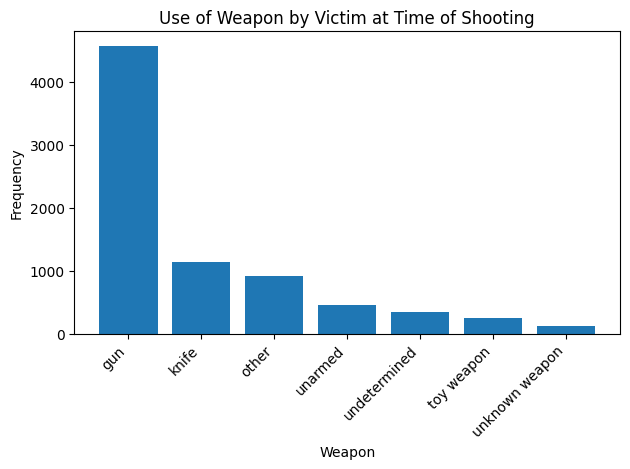

In [ ]:
def show_use_of_weapon_at_time_of_shooting(dataframe):
  category_counts = dataframe['armed'].value_counts()

  # Plotting the bar chart with rotated x-axis labels
  plt.bar(category_counts.index, category_counts)
  plt.xlabel('Weapon')
  plt.ylabel('Frequency')
  plt.title('Use of Weapon by Victim at Time of Shooting')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45, ha='right')

  # Uncomment to add text annotations for each bar
  # for i, freq in enumerate(category_counts):
  #     plt.text(i, freq + 0.1, str(freq), ha='center', va='bottom')

  # Adjust layout to prevent clipping of labels
  plt.tight_layout()

  plt.show()

show_use_of_weapon_at_time_of_shooting(df)

Just because this graph is so "trendy," let's also see how it looks like vertically.

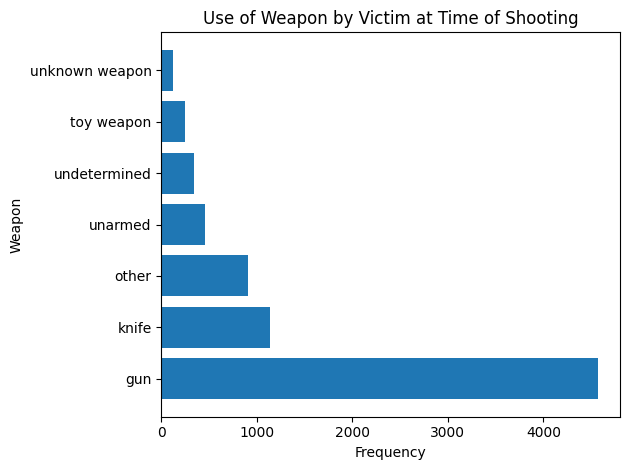

In [ ]:
category_counts = df['armed'].value_counts()

# Plotting the horizontal bar chart
plt.barh(category_counts.index, category_counts)
plt.xlabel('Frequency')
plt.ylabel('Weapon')
plt.title('Use of Weapon by Victim at Time of Shooting')

# Add text annotations for each bar
# for i, freq in enumerate(category_counts):
#     plt.text(freq + 0.1, i, str(freq), ha='left', va='center')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.show()

Interesting thoughts we had at this point:

If someone is driving away (fleeing by car), they'd be less of a threat so why kill them?

Also because the data is police killings rather than "shootings" we can wonder how such a large proportion of people could be killed when they were in a car (compared to foot, in fact more!), because someone in a car is less vulnerable than a person on foot.

Further, why do you want to kill a fleeing person in the first place (shoot) if they're not a drug-lord type criminal? Etc.



---



####Let's look at whether victims were fleeing at the time of shooting now.

In [ ]:
value_counts = df['flee'].value_counts()
print(value_counts.head())

Not fleeing    4430
Car            1289
Foot           1022
Other           295
Name: flee, dtype: int64


In [ ]:
1289+1022

2311

In [ ]:
1289/2311

0.5577672003461704

In [ ]:
df['flee'].describe()

count            7036
unique              4
top       Not fleeing
freq             4430
Name: flee, dtype: object

note in this by krishna: i wonder if the fact that there are body camera + shooting cases might imply that there's a flaw in the institution itself where police officers won't be prosecuted for unethical/unjust killings

##### Looking at Body Camera presence

In [ ]:
value_counts = df['body_camera'].value_counts()
print(value_counts.head(30))

False    6865
True     1137
Name: body_camera, dtype: int64


In [ ]:
df['body_camera'].describe()

count      8002
unique        2
top       False
freq       6865
Name: body_camera, dtype: object

In [ ]:
value_counts = df['threat_level'].value_counts()
print(value_counts.head(30))

attack          5010
other           2663
undetermined     329
Name: threat_level, dtype: int64


In [ ]:
df['threat_level'].describe()

count       8002
unique         3
top       attack
freq        5010
Name: threat_level, dtype: object

Note again: We didn't think that mental illness is a big factor to consider here, because a police officer in the heat of the moment won't know or have time to draw up the person's mental health history.

Now let's briefly look at manner of death and signs of mental illness.

In [ ]:
value_counts = df['signs_of_mental_illness'].value_counts()
value_counts.head()

False    6331
True     1671
Name: signs_of_mental_illness, dtype: int64

In [ ]:
value_counts = df['manner_of_death'].value_counts()
value_counts.head()

shot                7664
shot and Tasered     338
Name: manner_of_death, dtype: int64

In [ ]:
df['manner_of_death'].describe()

count     8002
unique       2
top       shot
freq      7664
Name: manner_of_death, dtype: object

Below, note how the shooting counts for the "head" cities are SO MUCH HIGHER than the counts for tail cities.

In [ ]:
value_counts = df['city'].value_counts()
print(value_counts.head())
value_counts.tail()  # Let's see if tail and head values are very off?

Los Angeles    130
Phoenix        105
Houston         91
Las Vegas       68
San Antonio     68
Name: city, dtype: int64


Crystal            1
Gibson             1
Neshoba County     1
Providence         1
Mariposa County    1
Name: city, dtype: int64

In [ ]:
value_counts = df['state'].value_counts()
value_counts.head()

CA    1143
TX     732
FL     509
AZ     363
GA     306
Name: state, dtype: int64

### Race
Let's look at one of our most interesting variables.

In [ ]:
# Primming up the dataframe to make it more convenient for plotting
df['race'] = df['race'].replace('W', 'White')
df['race'] = df['race'].replace('B', 'Black')
df['race'] = df['race'].replace('H', 'Hispanic')
df['race'] = df['race'].replace('A', 'Asian')
df['race'] = df['race'].replace('Native Amer.', 'Native')
df['race'] = df['race'].replace('O', 'Other')

In [ ]:
value_counts = df['race'].value_counts()
print(value_counts.head(6))

White       3300
Black       1766
Hispanic    1166
Asian        129
N            105
Other         19
Name: race, dtype: int64


Let's have a function to plot this extremely important variable!

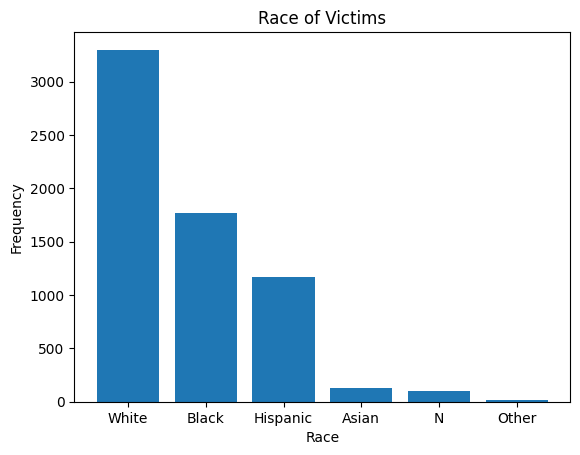

In [ ]:
def show_race_of_victims(dataframe):
  category_counts = dataframe['race'].value_counts()

  # Plotting the bar chart
  plt.bar(category_counts.index, category_counts)
  plt.xlabel('Race')
  plt.ylabel('Frequency')
  plt.title('Race of Victims')

  # for i, freq in enumerate(category_counts):
  #     plt.text(i, freq + 0.1, str(freq), ha='center', va='bottom')

  plt.show()

show_race_of_victims(df)

### Gender
Let's also look at whether the male-female disparity in shootings is different anywhere?

We'll do some similar adjustments to our df again, and create a function.

In [ ]:
df['gender'] = df['gender'].replace('M', 'Male')
df['gender'] = df['gender'].replace('F', 'Female')

In [ ]:
value_counts = df['gender'].value_counts()
print(value_counts.head(6))

Male      7613
Female     358
Name: gender, dtype: int64


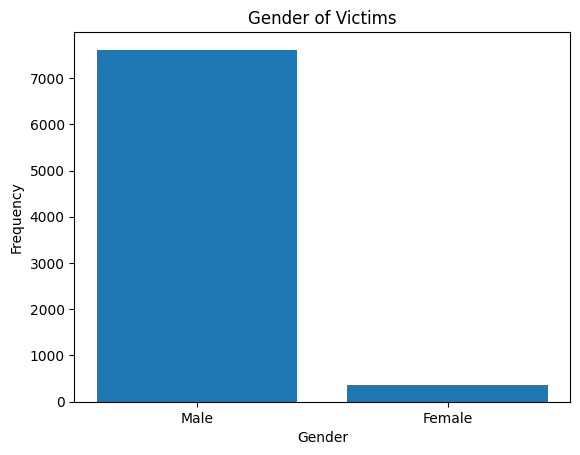

In [ ]:
def show_gender_of_victims(dataframe):
  category_counts = dataframe['gender'].value_counts()

  # Plotting the bar chart
  plt.bar(category_counts.index, category_counts)
  plt.xlabel('Gender')
  plt.ylabel('Frequency')
  plt.title('Gender of Victims')

  # for i, freq in enumerate(category_counts):
  #     plt.text(i, freq + 0.1, str(freq), ha='center', va='bottom')

  plt.show()

show_gender_of_victims(df)



---



In [ ]:
df.isna().sum()  # Checking how the fundamentals look

id                            0
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
age_range                   503
dtype: int64

### Date

We haven't look at this (usually) the first-to-be-looked-at variable yet because we already knew that the # of shootings has more or less remained in the 950-1050 range for a decade.

However, let's generate a plot for it so we have it visualized.

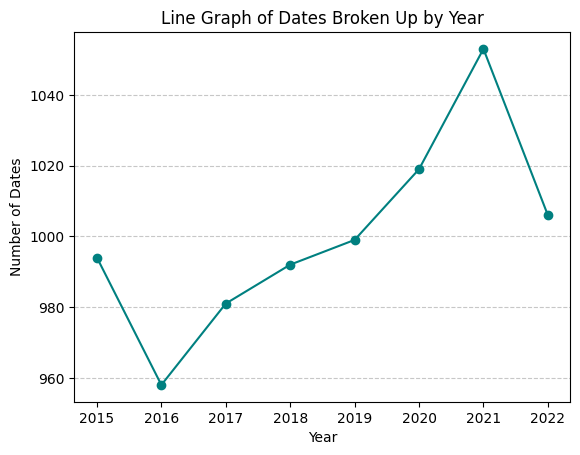

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Extract year from the datetime column
df['year'] = df['date'].dt.year

# Group by year and count the number of occurrences
yearly_counts = df['year'].value_counts().sort_index()

# Plotting the line graph
plt.plot(yearly_counts.index, yearly_counts, marker='o', linestyle='-', color='teal')
plt.xlabel('Year')
plt.ylabel('Number of Dates')
plt.title('Line Graph of Dates Broken Up by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each point with its value
# for i, value in enumerate(yearly_counts):
#     plt.annotate(f'{value}', (yearly_counts.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

Some more interesting plotting.

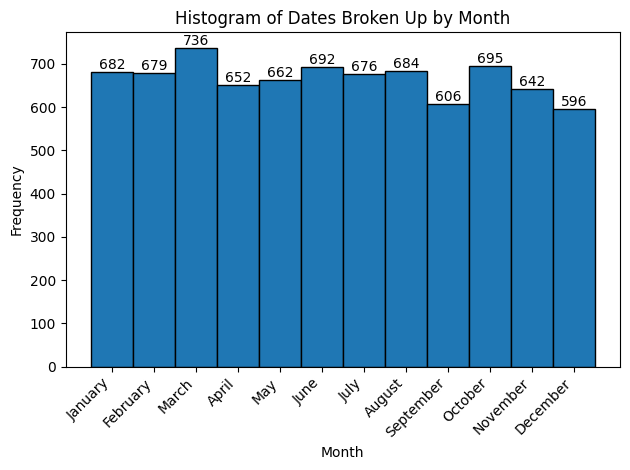

In [ ]:
def show_histogram_date_broken_up_by_month(df):
  # Convert 'date' column to datetime
  df['date'] = pd.to_datetime(df['date'])

  # Extract month from the datetime column
  df['month'] = df['date'].dt.month

  # Plotting the histogram
  plt.hist(df['month'], bins=range(1, 14), edgecolor='white', align='left', color='teal')
  plt.xlabel('Month')
  plt.ylabel('Frequency')
  plt.title('Histogram of Dates Broken Up by Month')
  plt.xticks(range(1, 13), [month.strftime('%B') for month in pd.date_range(start='2022-01-01', periods=12, freq='MS')])

  # Rotate x-axis labels and adjust layout
  plt.xticks(range(1, 13), [month.strftime('%B') for month in pd.date_range(start='2022-01-01', periods=12, freq='MS')], rotation=45, ha='right')
  plt.tight_layout()

  # Add frequency count centered over each bar
  for i, freq in enumerate(plt.hist(df['month'], bins=range(1, 14), edgecolor='black', align='left')[0]):
      plt.text(i + 1, freq, str(int(freq)), ha='center', va='bottom')

  plt.show()

show_histogram_date_broken_up_by_month(df)

## Location
Anything interesting about the locations?
**YES**. We see that Albuquerque has an interestingly high number of shootings - given that we know its population is low.

In [ ]:
value_counts = df['city'].value_counts()
print(value_counts.head(30))

Los Angeles      130
Phoenix          105
Houston           91
Las Vegas         68
San Antonio       68
Albuquerque       59
Chicago           50
Columbus          48
Denver            47
Jacksonville      46
Kansas City       45
Tucson            44
New York          43
Oklahoma City     41
Austin            41
Miami             37
St. Louis         37
Tulsa             34
Bakersfield       34
Atlanta           33
Louisville        32
Mesa              30
Philadelphia      30
Springfield       28
Baltimore         28
Portland          27
Washington        27
Fresno            27
San Diego         27
Orlando           25
Name: city, dtype: int64


Tail cities appear to have very few shootings per year.

In [ ]:
value_counts = df['city'].value_counts()
value_counts.tail(30)

Canaan                1
The Colony            1
Valley Head           1
Bremerton             1
New Britain           1
Rincon                1
Rose Bud              1
Old Forge             1
Peshtigo              1
Coral Springs         1
Lauderdale Lakes      1
Monticello            1
North Hollywood       1
Hillyard              1
Odanah                1
Penasco               1
Holland Township      1
Pell City             1
Warren County         1
West Monroe           1
Cedar Lake            1
Tremont               1
St. Tammany Parish    1
Dakota City           1
Hinds County          1
Crystal               1
Gibson                1
Neshoba County        1
Providence            1
Mariposa County       1
Name: city, dtype: int64

As we saw above, the tail cities have low shootings, so expectedly the average for the dataset overall should be dragged down by them. (We get an average of 2)

In [ ]:
value_counts = df['city'].value_counts()

# Calculate the average frequency
average_frequency = value_counts.mean()

print(f"Average Frequency: {average_frequency}")

Average Frequency: 2.4889580093312595


##Albuquerque
###Bearing down on a city with disproportionately high shootings per-capita

As we noticed above, Albuquerque's # shootings per year ranks among the highest, while its population ranks far, far below Chicago, Los Angeles etc.

So, let us split our dataset up, and utilize the functions we created earlier to generate the same plots we did for the general data for Albuquerque now.

In [ ]:
# Create a sub-df containing only Albuquerque data
albu_df = df[df["city"] == "Albuquerque"]
albu_df.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_range,year,month
24,46,2015-01-13,shot,gun,34.0,Male,White,Albuquerque,NM,False,attack,Foot,True,29-38,2015,1
333,445,2015-05-03,shot,gun,44.0,Male,Hispanic,Albuquerque,NM,False,attack,Not fleeing,False,39-48,2015,5
567,692,2015-07-31,shot,gun,33.0,Male,Hispanic,Albuquerque,NM,False,attack,Not fleeing,True,29-38,2015,7
854,997,2015-11-11,shot,NaN,31.0,Male,Hispanic,Albuquerque,NM,False,other,Car,False,29-38,2015,11
973,1117,2015-12-22,shot,gun,19.0,Male,Hispanic,Albuquerque,NM,False,undetermined,Foot,True,19-28,2015,12


### Generate plots for Albuquerque side-by-side with the general data for comparison.

For the charts below, for convenience, the first one for each category is the general data's chart, and the second is for Albuquerque.

Category Counts:
0-18      135
19-28    1771
29-38    2429
39-48    1563
49-58     974
58+       627
Name: age_range, dtype: int64


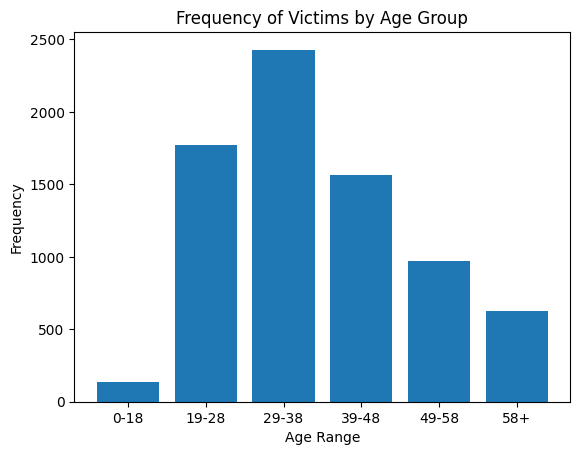

Category Counts:
0-18      0
19-28    13
29-38    16
39-48     9
49-58     6
58+       3
Name: age_range, dtype: int64


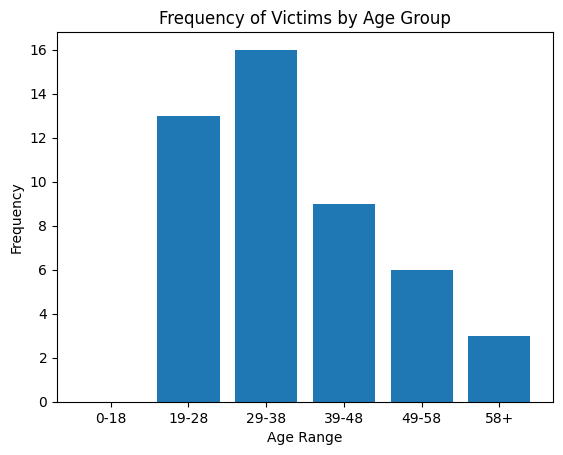

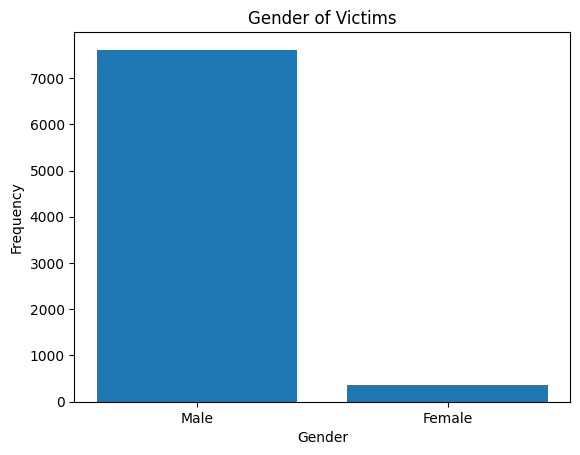

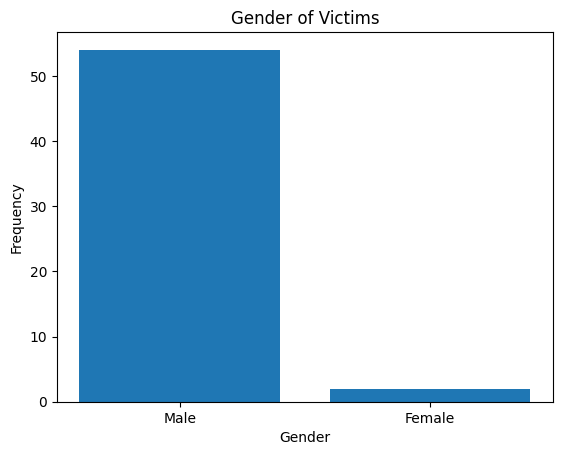

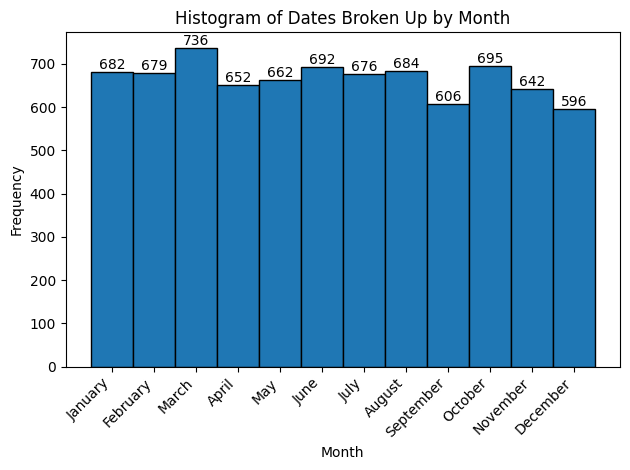

<ipython-input-135-962869dc141d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-135-962869dc141d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


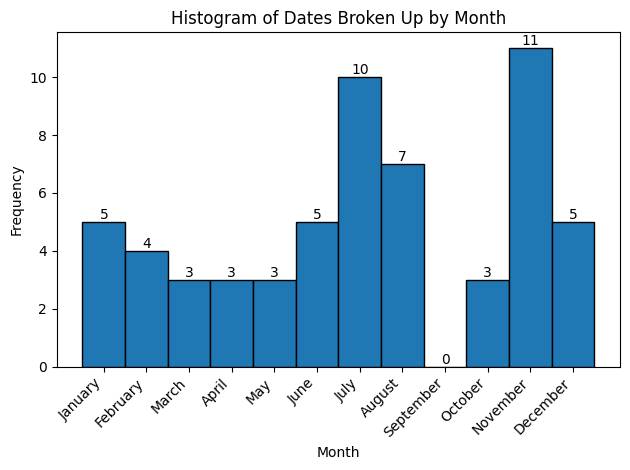

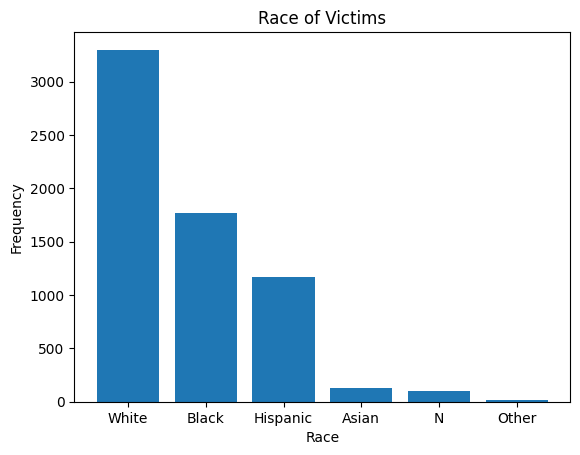

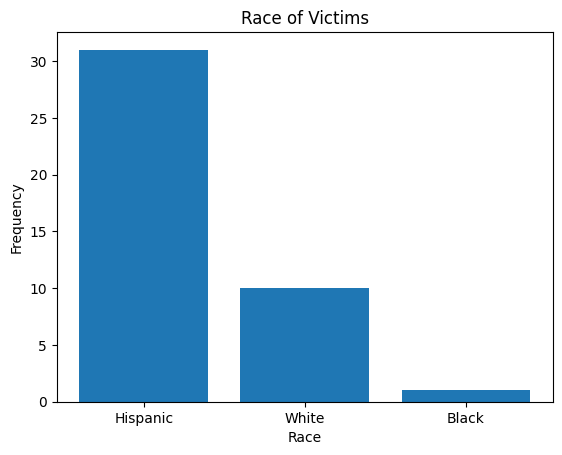

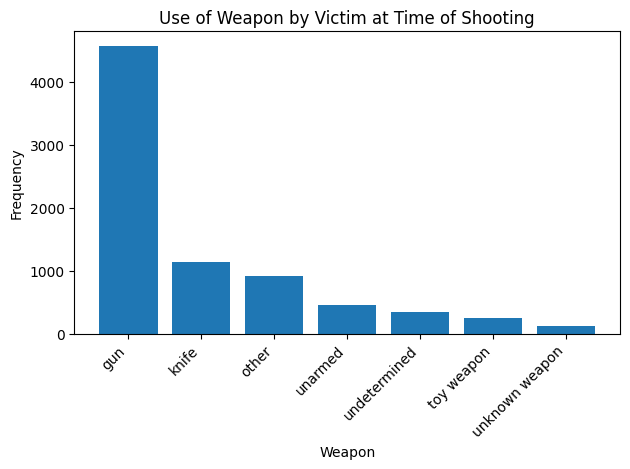

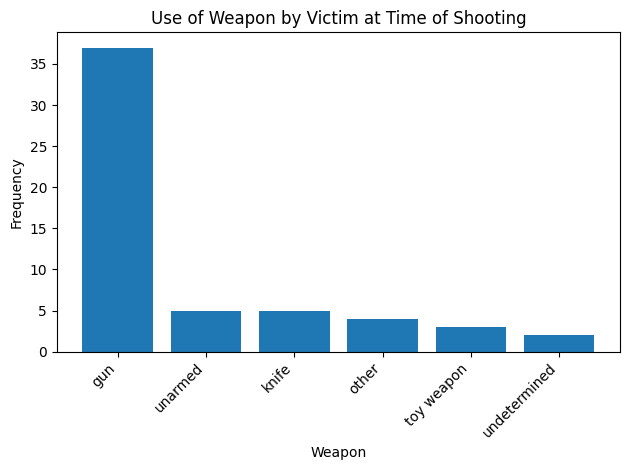

In [ ]:
print("For the charts below, for convenience, the first one for each category is the general data's " \
      "chart, and the second is for Albuquerque.\n")

show_frequency_of_victims_by_age_group(df)  # general
show_frequency_of_victims_by_age_group(albu_df)  # albu

show_gender_of_victims(df)  # general
show_gender_of_victims(albu_df)  # albu

show_histogram_date_broken_up_by_month(df)
show_histogram_date_broken_up_by_month(albu_df)

show_race_of_victims(df)
show_race_of_victims(albu_df)

show_use_of_weapon_at_time_of_shooting(df)
show_use_of_weapon_at_time_of_shooting(albu_df)